In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Add to sys.path if not already added
if project_root not in sys.path:
    sys.path.append(project_root)
print(sys.path)


['/opt/anaconda3/envs/ML_Kschool/lib/python311.zip', '/opt/anaconda3/envs/ML_Kschool/lib/python3.11', '/opt/anaconda3/envs/ML_Kschool/lib/python3.11/lib-dynload', '', '/Users/jayarza/.local/lib/python3.11/site-packages', '/opt/anaconda3/envs/ML_Kschool/lib/python3.11/site-packages', '/Users/jayarza/Developer/Master Data Science/TFM/Proyecto_Git/TFM_GroupC_KS24-25']


In [2]:
from tfm_functions_bd_mac import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [3]:
# Call get_houses with explicit credentials
df_houses = pd.DataFrame(get_all_houses(),columns=[
"HOUSE_ID",
"TITLE",
"PRICE",
"ADDRESS1",
"ADDRESS2",
"CITY",
"ENERGY_CONSUME",
"ENERGY_EMISSION",
"PLANTA",
"SUPERFICIE",
"HABITACIONES",
"BANOS",
"GARAJE",
"ESTADO",
"ARMARIOS_EMPOTRADOS",
"ANO",
"CALEFACCION",
"PISCINA",
"JARDIN",
"UPDATE_DATE",
"URL",
"ZONA",
"MORE_INFO",
"ASCENSOR",
"MOVILIDAD_REDUCIDA",
"TRASTERO",
"TERRAZA",
"BALCON",
"AIRE_ACOND",
"ORIENTACION",
"LATITUDE",
"LONGITUDE",
"CREATED_DATE",
"UPDATED_DATE",
"DISTRITO",
"PRICE_PER_NIGHT"])


In [4]:
len(df_houses)

8208

In [5]:
df_houses

,HOUSE_ID,TITLE,PRICE,ADDRESS1,ADDRESS2,CITY,ENERGY_CONSUME,ENERGY_EMISSION,PLANTA,SUPERFICIE,...,TERRAZA,BALCON,AIRE_ACOND,ORIENTACION,LATITUDE,LONGITUDE,CREATED_DATE,UPDATED_DATE,DISTRITO,PRICE_PER_NIGHT
0,100053144,Piso en venta en calle de Saturno,142000.0,Calle de Saturno,Barrio Casco Histórico de Barajas,"Madrid capital, Madrid",None,None,Planta 1ª,Consumo: \n260 kWh/m² año,...,False,False,False,None,40.473428,-3.579610,2025-05-25 16:40:39.310,2025-05-26 16:59:12.613,Barajas,122.74
1,100225591,Casa o chalet independiente en venta en calle ...,439000.0,"Calle Espliego, 17",Villalbilla,"Corredor del Henares, Madrid",None,None,2 plantas,Parcela de 710 m²,...,True,False,False,Orientación sur,40.444625,-3.285052,2025-05-25 16:40:39.310,2025-05-26 16:59:23.887,Not defined,None
2,100281275,Chalet adosado en venta en Las Matas- Peñascales,280000.0,Barrio Las Matas- Peñascales,Distrito Las Matas- Peñascales,"Zona noroeste, Madrid",None,None,2 plantas,"Emisiones: \n65,5 kg CO2/m² año",...,True,False,False,"Orientación sur, este, oeste",40.416728,-3.703291,2025-05-25 16:40:39.310,2025-05-26 16:59:26.273,Centro,155.44
3,100445913,Piso en venta en calle Marcelo Usera,259000.0,Calle Marcelo Usera,Barrio Moscardó,"Madrid capital, Madrid",icon-energy-c-f,icon-energy-c-f,None,"73 m² construidos, 67 m² útiles",...,False,False,False,"Orientación norte, sur",40.385695,-3.707122,2025-05-25 16:40:39.310,2025-05-26 17:19:30.850,Usera,128.58
4,100454896,Piso en venta en Fuentes s/n,139900.0,Fuentes s/n,Distrito Noroeste,"Corredor del Henares, Madrid",None,None,Planta 5ª exterior,63 m² construidos,...,False,False,False,None,40.416731,-3.703297,2025-05-25 16:40:39.310,2025-05-26 17:19:31.137,Centro,155.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,99447659,Piso en venta en calle de Ascao,518000.0,Calle de Ascao,Barrio Pueblo Nuevo,"Madrid capital, Madrid",None,None,Planta 1ª,"162 m² construidos, 128 m² útiles",...,True,False,False,None,40.431187,-3.638597,2025-05-25 16:40:39.310,2025-05-26 23:16:18.123,Ciudad Lineal,181.40
8204,99506799,"Piso en venta en calle de las Margaritas, 7",230000.0,"Calle de las Margaritas, 7",Becerril de la Sierra,"Zona noroeste, Madrid",None,None,Planta 3ª exterior,"110 m² construidos, 105 m² útiles",...,True,False,False,Orientación este,40.715172,-3.987483,2025-05-25 16:40:39.310,2025-05-26 23:16:18.410,Not defined,None
8205,99616898,"Piso en venta en calle de Andrés Mellado, 18",480000.0,"Calle de Andrés Mellado, 18",Barrio Gaztambide,"Madrid capital, Madrid",None,None,Planta 4ª interior,"40 m² construidos, 32 m² útiles",...,False,True,False,None,40.432178,-3.714310,2025-05-25 16:40:39.310,2025-05-26 23:16:18.690,Chamberí,106.55
8206,99904936,Piso en venta en Zaburdón - Monte Escorial,141000.0,Distrito Zaburdón - Monte Escorial,San Lorenzo de El Escorial,"Zona noroeste, Madrid",None,None,None,408 m² construidos,...,False,False,False,None,40.602407,-4.127118,2025-05-25 16:40:39.310,2025-05-26 23:16:18.940,Not defined,None


In [6]:
columns_to_drop = ["HOUSE_ID",
"TITLE",
"PRICE",
"ADDRESS1",
"ADDRESS2",
"CITY",
"ENERGY_CONSUME",
"ENERGY_EMISSION",
"PLANTA",
"GARAJE",
"ESTADO",
"ARMARIOS_EMPOTRADOS",
"ANO",
"CALEFACCION",
"PISCINA",
"UPDATE_DATE",
"URL",
"MORE_INFO",
"ASCENSOR",
"MOVILIDAD_REDUCIDA",
"TRASTERO",
"AIRE_ACOND",
"ORIENTACION",
"ZONA",
"CREATED_DATE",
"UPDATED_DATE",
"PRICE_PER_NIGHT"]


df_houses.drop(columns=columns_to_drop, inplace=True)

In [7]:
df_houses.head()

,SUPERFICIE,HABITACIONES,BANOS,JARDIN,TERRAZA,BALCON,LATITUDE,LONGITUDE,DISTRITO
0,Consumo: \n260 kWh/m² año,3 habitaciones,1 baño,False,False,False,40.473428,-3.579610,Barajas
1,Parcela de 710 m²,5 habitaciones,3 baños,True,True,False,40.444625,-3.285052,Not defined
2,"Emisiones: \n65,5 kg CO2/m² año",3 habitaciones,1 baño,False,True,False,40.416728,-3.703291,Centro
3,"73 m² construidos, 67 m² útiles",3 habitaciones,1 baño,False,False,False,40.385695,-3.707122,Usera
4,63 m² construidos,3 habitaciones,1 baño,False,False,False,40.416731,-3.703297,Centro


In [8]:
df_houses.isnull().sum()

SUPERFICIE      0
HABITACIONES    0
BANOS           0
JARDIN          0
TERRAZA         0
BALCON          0
LATITUDE        0
LONGITUDE       0
DISTRITO        0
dtype: int64

#### Banos

In [9]:
df_houses["BANOS"].unique()

array(['1 baño', '3 baños', '5 baños', '2 baños', '6 baños', '11 baños',
       '4 baños', '8 baños', 'Sin baños', '7 baños', '9 baños',
       '10 baños', '30 baños', '16 baños', '12 baños'], dtype=object)

In [10]:
df_houses["BAÑOS"] = [0 if x == 'Sin baños' else int(x.replace("baños", "").replace("baño", "").strip()) for x in df_houses["BANOS"]]

In [11]:
df_houses["BAÑOS"].unique()

array([ 1,  3,  5,  2,  6, 11,  4,  8,  0,  7,  9, 10, 30, 16, 12])

#### Habitaciones

In [12]:
df_houses["HABITACIONES"].unique()

array(['3 habitaciones', '5 habitaciones', '4 habitaciones',
       '2 habitaciones', '1 habitación', '6 habitaciones',
       'Sin habitación', '8 habitaciones', '7 habitaciones',
       '9 habitaciones', '11 habitaciones', '10 habitaciones',
       '20 habitaciones', '14 habitaciones', '30 habitaciones',
       '16 habitaciones', '12 habitaciones'], dtype=object)

In [13]:
df_houses["HABITACIONES"] = [0 if x == 'Sin habitación' else int(x.replace("habitaciones", "").replace("habitación", "").strip()) for x in df_houses["HABITACIONES"]]

In [14]:
df_houses["HABITACIONES"].unique()

array([ 3,  5,  4,  2,  1,  6,  0,  8,  7,  9, 11, 10, 20, 14, 30, 16, 12])

Borramos las filas que no tengan ninguna ninguna habitacion o ningun baño

In [15]:
df_houses = df_houses[df_houses["BANOS"] != 0]
df_houses = df_houses[df_houses["HABITACIONES"] != 0]

#### Superficie

In [16]:
df_houses["SUPERFICIE"].unique()

array(['Consumo: \n260 kWh/m² año', 'Parcela de 710 m²',
       'Emisiones: \n65,5 kg CO2/m² año', ...,
       '162 m² construidos, 128 m² útiles', '408 m² construidos',
       '35 m² construidos, 30 m² útiles'], dtype=object)

In [17]:
df_houses = df_houses[((df_houses["SUPERFICIE"].str.contains("construidos")) | (df_houses["SUPERFICIE"].str.contains("Parcela")))]

In [18]:
df_houses["SUPERFICIE"].unique()

array(['Parcela de 710 m²', '73 m² construidos, 67 m² útiles',
       '63 m² construidos', ..., '162 m² construidos, 128 m² útiles',
       '408 m² construidos', '35 m² construidos, 30 m² útiles'],
      dtype=object)

In [19]:
len(df_houses)

7487

In [20]:
import re

# Extract the numeric value (surface in m²) from the 'SUPERFICIE' column
df_houses['SUPERFICIE_M2'] = df_houses['SUPERFICIE'].str.extract(r'(\d+)\s*m²')
df_houses['SUPERFICIE_M2'] = df_houses['SUPERFICIE_M2'].astype(float)


In [21]:
df_houses

,SUPERFICIE,HABITACIONES,BANOS,JARDIN,TERRAZA,BALCON,LATITUDE,LONGITUDE,DISTRITO,BAÑOS,SUPERFICIE_M2
1,Parcela de 710 m²,5,3 baños,True,True,False,40.444625,-3.285052,Not defined,3,710.0
3,"73 m² construidos, 67 m² útiles",3,1 baño,False,False,False,40.385695,-3.707122,Usera,1,73.0
4,63 m² construidos,3,1 baño,False,False,False,40.416731,-3.703297,Centro,1,63.0
5,175 m² construidos,3,3 baños,False,True,False,40.431497,-3.723654,Moncloa - Aravaca,3,175.0
6,76 m² construidos,3,1 baño,False,False,False,-19.995262,23.418077,Not defined,1,76.0
...,...,...,...,...,...,...,...,...,...,...,...
8203,"162 m² construidos, 128 m² útiles",4,2 baños,False,True,False,40.431187,-3.638597,Ciudad Lineal,2,162.0
8204,"110 m² construidos, 105 m² útiles",3,2 baños,False,True,False,40.715172,-3.987483,Not defined,2,110.0
8205,"40 m² construidos, 32 m² útiles",1,1 baño,False,False,True,40.432178,-3.714310,Chamberí,1,40.0
8206,408 m² construidos,1,1 baño,False,False,False,40.602407,-4.127118,Not defined,1,408.0


In [22]:
df_houses["SUPERFICIE_M2"].value_counts()

SUPERFICIE_M2
60.0     157
80.0     152
70.0     128
90.0     120
100.0    117
        ... 
601.0      1
7.0        1
694.0      1
424.0      1
408.0      1
Name: count, Length: 616, dtype: int64

In [23]:
df = df_houses.copy()

## MODELO PREDICCION METROS CUADRADOS

### Clasificacion KNN

In [24]:
df_houses = df.copy()

In [25]:
df_houses.dtypes

SUPERFICIE        object
HABITACIONES       int64
BANOS             object
JARDIN              bool
TERRAZA             bool
BALCON              bool
LATITUDE         float64
LONGITUDE        float64
DISTRITO          object
BAÑOS              int64
SUPERFICIE_M2    float64
dtype: object

In [26]:
df_houses["SUPERFICIE_M2"].isnull().sum()

0

In [27]:
def get_range_meters(meters):
    match meters:
        # case m if m < 50:
        #     return "<50"
        # case m if 50 <= m < 60:
        #     return "50-60"
        # case m if 60 <= m < 70:
        #     return "60-70"
        # case m if 70 <= m < 80:
        #     return "70-80"
        # case m if 80 <= m < 90:
        #     return "80-90"
        # case m if 90 <= m < 100:
        #     return "90-100"
        # case m if 100 <= m < 110:
        #     return "100-110"
        # case m if 110 <= m < 120:
        #     return "110-120"
        # case m if 120 <= m < 130:
        #     return "120-130"
        # case m if 130 <= m < 140:
        #     return "130-140"
        # case m if 140 <= m < 150:
        #     return "140-150"
        # case _:
        #     return ">150" 
        
        case m if m < 60:
            return "<60"
        case m if 60 <= m < 80:
            return "60-80"
        case m if 80 <= m < 100:
            return "80-100"
        case m if 100 <= m < 120:
            return "100-120"
        case m if 120 <= m < 150:
            return "100-150"
        case _:
             return ">150" 

In [28]:
df_houses["range_meters"] = df_houses["SUPERFICIE_M2"].apply(lambda x: get_range_meters(x))

<Axes: xlabel='range_meters'>

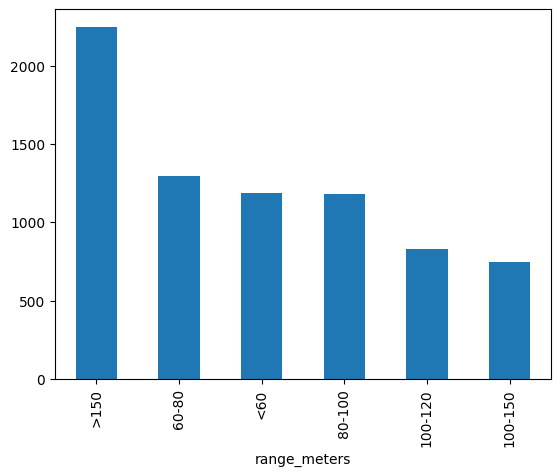

In [29]:
df_houses["range_meters"].value_counts().plot.bar()

In [30]:
df_houses["range_meters"].value_counts()

range_meters
>150       2246
60-80      1298
<60        1188
80-100     1178
100-120     828
100-150     749
Name: count, dtype: int64

In [31]:
center_lat, center_lon = 40.4168, -3.7038

# Create distance to city center
df_houses['distance_to_center'] = np.sqrt((df_houses['LATITUDE'] - center_lat)**2 + (df_houses['LONGITUDE'] - center_lon)**2)

In [32]:
df_houses.dtypes

SUPERFICIE             object
HABITACIONES            int64
BANOS                  object
JARDIN                   bool
TERRAZA                  bool
BALCON                   bool
LATITUDE              float64
LONGITUDE             float64
DISTRITO               object
BAÑOS                   int64
SUPERFICIE_M2         float64
range_meters           object
distance_to_center    float64
dtype: object

In [33]:
df_houses.drop(columns=["SUPERFICIE","SUPERFICIE_M2","LATITUDE","LONGITUDE","DISTRITO","BANOS","JARDIN"],inplace=True)

In [34]:
df_houses

,HABITACIONES,TERRAZA,BALCON,BAÑOS,range_meters,distance_to_center
1,5,True,False,3,>150,0.419671
3,3,False,False,1,60-80,0.031282
4,3,False,False,1,60-80,0.000508
5,3,True,False,3,>150,0.024702
6,3,False,False,1,60-80,66.220944
...,...,...,...,...,...,...
8203,4,True,False,2,>150,0.066771
8204,3,True,False,2,100-120,0.411706
8205,1,False,True,1,<60,0.018627
8206,1,False,False,1,>150,0.462221


In [35]:
from sklearn.model_selection import train_test_split

target = "range_meters"
y,X =df_houses[target], df_houses.drop(target,axis="columns")


x_train, x_test, y_train, y_test = train_test_split(X, # observaciones
                                                    y, # targets alineados con las observaciones
                                                    test_size=0.3, # ratio de observaciones que se van al conjunto de test,
                                                    random_state=42) # estado del generador de números aleatorios


from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 70
knn = KNeighborsClassifier(n_neighbors=n_neighbors) # instanciar el objeto con hiperparámetros
knn.fit(x_train, y_train) # entrenar
acierto_entrenamiento = knn.score(x_train, y_train)
acierto_test = knn.score(x_test, y_test) # evaluar el modelo entrenado
print("Acierto en el conjunto de entrenamiento: {0:.2f}%".format(acierto_entrenamiento*100.))
print("Acierto en el conjunto de test: {0:.2f}%".format(acierto_test*100.))

Acierto en el conjunto de entrenamiento: 54.94%
Acierto en el conjunto de test: 54.78%


In [36]:
v_nn = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
ac_entr = np.empty(len(v_nn))
ac_test = np.empty(len(v_nn))
for inn, n_neighbors in enumerate(v_nn):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    ac_entr[inn] = knn.score(x_train, y_train)
    ac_test[inn] = knn.score(x_test, y_test)

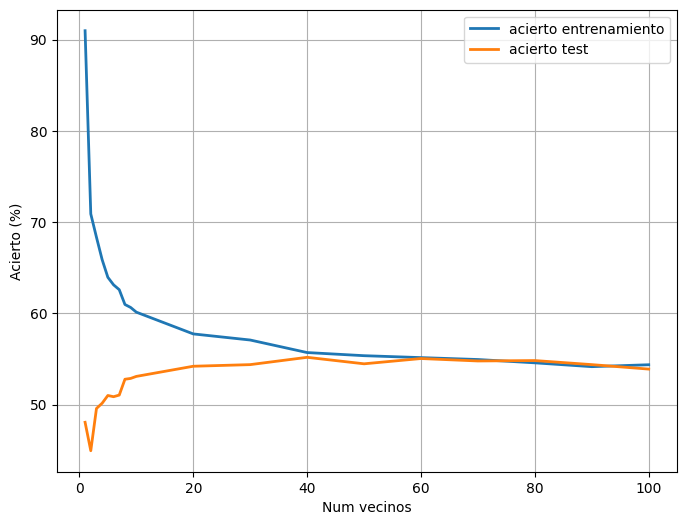

In [37]:
plt.figure(figsize=(8,6))
plt.plot(v_nn, ac_entr*100, linewidth=2, label='acierto entrenamiento')
plt.plot(v_nn, ac_test*100, linewidth=2,label='acierto test')
_ = plt.xlabel('Num vecinos')
_ = plt.ylabel('Acierto (%)')
_ = plt.legend()
plt.grid()

In [38]:
best_k = v_nn[np.argmax(ac_test)]
print("El numero de vecinos que da el mejor resultado en test es {0:d}, acierto del  {1:.2f}%".format(best_k, 100.*np.max(ac_test)))
acierto_spam_knn = 100.*np.max(ac_test)

El numero de vecinos que da el mejor resultado en test es 40, acierto del  55.18%


In [39]:
ac_entr_w = np.empty(len(v_nn))
ac_test_w = np.empty(len(v_nn))
for inn, n_neighbors in enumerate(v_nn):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    knn.fit(x_train, y_train)
    ac_entr_w[inn] = knn.score(x_train, y_train)
    ac_test_w[inn] = knn.score(x_test, y_test)

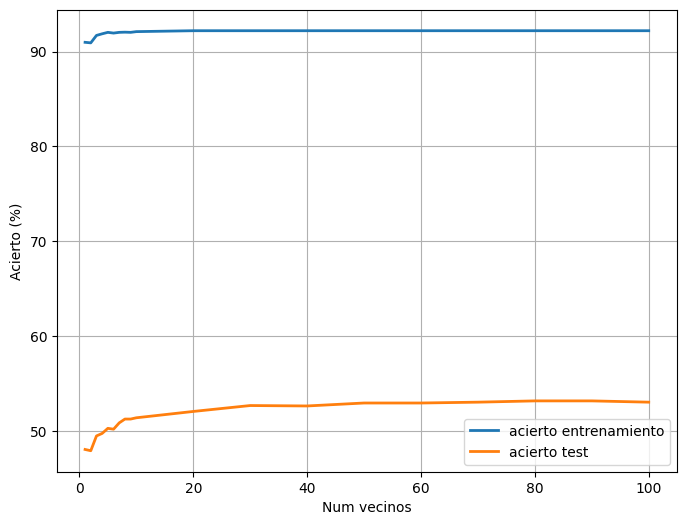

In [40]:
plt.figure(figsize=(8,6))
plt.plot(v_nn, ac_entr_w*100, linewidth=2, label='acierto entrenamiento')
plt.plot(v_nn, ac_test_w*100, linewidth=2,label='acierto test')
_ = plt.xlabel('Num vecinos')
_ = plt.ylabel('Acierto (%)')
_ = plt.legend()
plt.grid()

In [41]:
best_k = v_nn[np.argmax(ac_test_w)]
print("El número de vecinos que da el mejor resultado en test si ponderamos por distancias es {0:d}, acierto del {1:.2f}%".format(best_k, 100.*np.max(ac_test_w)))
acierto_spam_knn_w = 100.*np.max(ac_test_w)

El número de vecinos que da el mejor resultado en test si ponderamos por distancias es 80, acierto del 53.18%


In [42]:
def pinta_ejemplo(x,y,xt,ax):
  ax.scatter(x[y==0,0],x[y==0,1],color='blue',marker='o')
  ax.scatter(x[y==1,0],x[y==1,1],color='red',marker='x')
  ax.scatter(xt[0], xt[1], marker='s', color='green')

def pinta_radios(c,x,ax):
  for ii in range(len(x)):
    ax.plot([c[0],x[ii,0]],
            [c[1],x[ii,1]],
            linestyle=':',
            linewidth=2)
    
def pinta_votos(clase, peso, ax):
  labels = ['unitario', 'ponderado']
  k = len(clase)
  bottom = np.zeros(2)
  width = 0.5
  for ii in range(k):
    if clase[ii] == 1:
      color = 'red'
    else:
      color = 'blue'
    ax.bar(labels, [1./k, peso[ii]], 
           width=width, 
           label='vecino {0:d}'.format(ii+1),
           bottom = bottom,
           edgecolor='black',
           color=color)
    bottom += np.array([1./k, peso[ii]])

In [43]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import pairwise_distances 
bins=50
A = pairwise_distances(x_test, x_train,'euclidean') 
sorted_A = 1e-6+np.sort(A, axis=1) # distancias a los vecinos ¿qué tan lejos está el vecino k-ésimo?
radios = sorted_A[:, 1]
logbins = np.logspace(0,np.log10(np.max(radios)+1),(bins))
rad_ac_entr = np.empty(bins)
rad_ac_test = np.empty(bins)
for ir, radius in enumerate(logbins):
    rknn = RadiusNeighborsClassifier(radius=radius,  outlier_label='most_frequent')
    rknn.fit(x_train, y_train)
    rad_ac_entr[ir] = rknn.score(x_train, y_train)
    rad_ac_test[ir] = rknn.score(x_test, y_test)



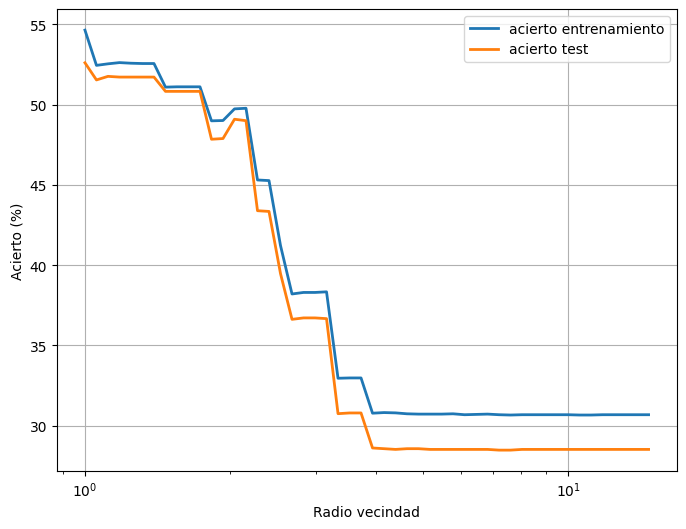

In [44]:
plt.figure(figsize=(8,6))
plt.plot(logbins, rad_ac_entr*100, lw=2, label='acierto entrenamiento')
plt.plot(logbins, rad_ac_test*100, lw=2,label='acierto test')
plt.xscale('log')
_ = plt.xlabel('Radio vecindad')
_ = plt.ylabel('Acierto (%)')
_ = plt.legend()
plt.grid()

### Regression KNN

In [45]:
df_houses = df.copy()

In [46]:
df_houses.dtypes

SUPERFICIE        object
HABITACIONES       int64
BANOS             object
JARDIN              bool
TERRAZA             bool
BALCON              bool
LATITUDE         float64
LONGITUDE        float64
DISTRITO          object
BAÑOS              int64
SUPERFICIE_M2    float64
dtype: object

In [47]:
df_houses["SUPERFICIE_M2"].isnull().sum()

0

In [48]:
center_lat, center_lon = 40.4168, -3.7038

# Create distance to city center
df_houses['distance_to_center'] = np.sqrt((df_houses['LATITUDE'] - center_lat)**2 + (df_houses['LONGITUDE'] - center_lon)**2)

In [49]:
df_houses.dtypes

SUPERFICIE             object
HABITACIONES            int64
BANOS                  object
JARDIN                   bool
TERRAZA                  bool
BALCON                   bool
LATITUDE              float64
LONGITUDE             float64
DISTRITO               object
BAÑOS                   int64
SUPERFICIE_M2         float64
distance_to_center    float64
dtype: object

In [50]:
df_houses.drop(columns=["SUPERFICIE","LATITUDE","LONGITUDE","DISTRITO","BANOS","JARDIN"],inplace=True)

In [51]:
df_houses

,HABITACIONES,TERRAZA,BALCON,BAÑOS,SUPERFICIE_M2,distance_to_center
1,5,True,False,3,710.0,0.419671
3,3,False,False,1,73.0,0.031282
4,3,False,False,1,63.0,0.000508
5,3,True,False,3,175.0,0.024702
6,3,False,False,1,76.0,66.220944
...,...,...,...,...,...,...
8203,4,True,False,2,162.0,0.066771
8204,3,True,False,2,110.0,0.411706
8205,1,False,True,1,40.0,0.018627
8206,1,False,False,1,408.0,0.462221


In [52]:
from sklearn.model_selection import train_test_split

target = "SUPERFICIE_M2"
y,X =df_houses[target], df_houses.drop(target,axis="columns")


x_train, x_test, y_train, y_test = train_test_split(X, # observaciones
                                                    y, # targets alineados con las observaciones
                                                    test_size=0.3, # ratio de observaciones que se van al conjunto de test,
                                                    random_state=42) # estado del generador de números aleatorios


from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 3
knn = KNeighborsRegressor(n_neighbors=n_neighbors)
knn.fit(x_train, y_train)
riesgo_entrenamiento = knn.score(x_train, y_train)
riego_test = knn.score(x_test, y_test)
print("R^2 en el conjunto de entrenamiento: {0:.2f}".format(riesgo_entrenamiento))
print("R^2 en el conjunto de test: {0:.2f}".format(riego_test))

R^2 en el conjunto de entrenamiento: 0.61
R^2 en el conjunto de test: 0.28


In [53]:
from sklearn.metrics import r2_score
v_nn = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,350]
r2_entr = np.empty(len(v_nn))
r2_test = np.empty(len(v_nn))
for inn, n_neighbors in enumerate(v_nn):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    r2_entr[inn] = knn.score(x_train, y_train)
    r2_test[inn] = knn.score(x_test, y_test)

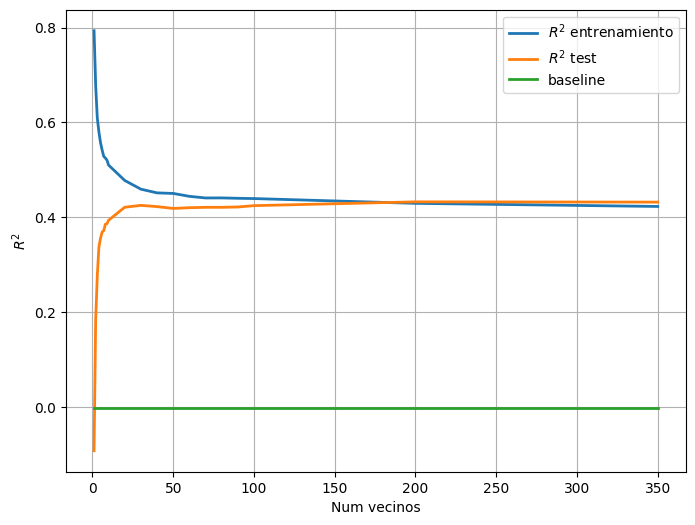

El número de vecinos que da el mejor resultado en test es 200, R^2 del  0.43


In [54]:
plt.figure(figsize=(8,6))
plt.plot(v_nn, r2_entr, lw=2,label='$R^2$ entrenamiento')
plt.plot(v_nn, r2_test, lw=2,label='$R^2$ test')
plt.plot(v_nn, r2_score(y_test,np.ones(len(y_test))*np.mean(y_train))*np.ones(len(v_nn)), lw=2, label='baseline')
_ = plt.xlabel('Num vecinos')
_ = plt.ylabel('$R^2$')
_ = plt.legend()

plt.grid()
best_k = v_nn[np.argmax(r2_test)]
plt.show()
print("El número de vecinos que da el mejor resultado en test es {0:d}, R^2 del  {1:.2f}".format(best_k, np.max(r2_test)))
acierto_housing_knn = np.max(r2_test)

In [55]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

svc = SVC(kernel='rbf')


from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

from sklearn.model_selection import GridSearchCV
#param_grid = {'svc__C': [1, 5, 10], 'svc__gamma': [0.0001, 0.001, 0.005]}
param_grid = {'svc__C': [1, 5, 10], 'svc__gamma': [0.0001, 0.001, 0.005], 'svc__kernel': ['rbf', 'poly', 'sigmoid']}
# param_grid = {'svc__C': [1], 'svc__gamma': [0.0001], 'svc__kernel': ['rbf', 'poly']}
grid = GridSearchCV(svc, param_grid)

%time grid.fit(Xtrain, ytrain)


/Users/jayarza/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ValueError: Invalid parameter 'svc' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].

### Clasificacion SVM

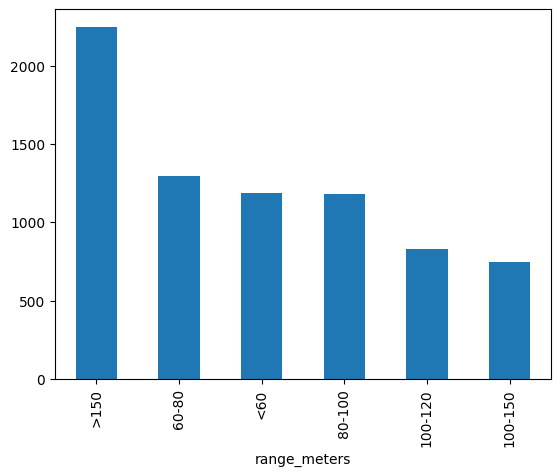

In [56]:
### Clasificacion KNN
df_houses = df.copy()
df_houses.dtypes
df_houses["SUPERFICIE_M2"].isnull().sum()
def get_range_meters(meters):
    match meters:
        # case m if m < 50:
        #     return "<50"
        # case m if 50 <= m < 60:
        #     return "50-60"
        # case m if 60 <= m < 70:
        #     return "60-70"
        # case m if 70 <= m < 80:
        #     return "70-80"
        # case m if 80 <= m < 90:
        #     return "80-90"
        # case m if 90 <= m < 100:
        #     return "90-100"
        # case m if 100 <= m < 110:
        #     return "100-110"
        # case m if 110 <= m < 120:
        #     return "110-120"
        # case m if 120 <= m < 130:
        #     return "120-130"
        # case m if 130 <= m < 140:
        #     return "130-140"
        # case m if 140 <= m < 150:
        #     return "140-150"
        # case _:
        #     return ">150" 
        
        case m if m < 60:
            return "<60"
        case m if 60 <= m < 80:
            return "60-80"
        case m if 80 <= m < 100:
            return "80-100"
        case m if 100 <= m < 120:
            return "100-120"
        case m if 120 <= m < 150:
            return "100-150"
        case _:
             return ">150" 
df_houses["range_meters"] = df_houses["SUPERFICIE_M2"].apply(lambda x: get_range_meters(x))
df_houses["range_meters"].value_counts().plot.bar()
df_houses["range_meters"].value_counts()
center_lat, center_lon = 40.4168, -3.7038

# Create distance to city center
df_houses['distance_to_center'] = np.sqrt((df_houses['LATITUDE'] - center_lat)**2 + (df_houses['LONGITUDE'] - center_lon)**2)
df_houses.dtypes
df_houses.drop(columns=["SUPERFICIE","SUPERFICIE_M2","LATITUDE","LONGITUDE","DISTRITO","BANOS","JARDIN"],inplace=True)
df_houses
from sklearn.model_selection import train_test_split

target = "range_meters"
y,X =df_houses[target], df_houses.drop(target,axis="columns")


x_train, x_test, y_train, y_test = train_test_split(X, # observaciones
                                                    y, # targets alineados con las observaciones
                                                    test_size=0.3, # ratio de observaciones que se van al conjunto de test,
                                                    random_state=42) # estado del generador de números aleatorios



In [58]:

from sklearn.svm import SVC


model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 52.83%
